# Introdução ao Pandas
## Andre Nepomuceno - UFF

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

**1. Series**

In [2]:
tamanho_rios = pd.Series ([6300 , 6650 , 6275 , 6400])
tamanho_rios

0    6300
1    6650
2    6275
3    6400
dtype: int64

In [3]:
tamanho_rios = pd.Series([6300,6650,6275,6400] , name='Comprimento',
dtype = float )
tamanho_rios

0    6300.0
1    6650.0
2    6275.0
3    6400.0
Name: Comprimento, dtype: float64

In [4]:
#indexação
tamanho_rios = pd.Series([6300, 6650, 6275, 6400], 
                          index =['Yangtze', 'Nilo', 'Mississippi ', 'Amazonas'],
                          name='Comprimento')
tamanho_rios

Yangtze         6300
Nilo            6650
Mississippi     6275
Amazonas        6400
Name: Comprimento, dtype: int64

In [5]:
tamanho_rios.index

Index(['Yangtze', 'Nilo', 'Mississippi ', 'Amazonas'], dtype='object')

In [6]:
tamanho_rios['Nilo']

6650

In [7]:
tamanho_rios[1]

6650

In [8]:
tamanho_rios[['Amazonas', 'Nilo']]

Amazonas    6400
Nilo        6650
Name: Comprimento, dtype: int64

In [9]:
tamanho_rios['Nilo':'Amazonas']

Nilo            6650
Mississippi     6275
Amazonas        6400
Name: Comprimento, dtype: int64

In [10]:
km2mi =  0.621371

In [11]:
tamanho_rios = tamanho_rios*km2mi
tamanho_rios

Yangtze         3914.637300
Nilo            4132.117150
Mississippi     3899.103025
Amazonas        3976.774400
Name: Comprimento, dtype: float64

In [12]:
tamanho_rios[tamanho_rios < 4000]

Yangtze         3914.637300
Mississippi     3899.103025
Amazonas        3976.774400
Name: Comprimento, dtype: float64

In [13]:
massas = pd.Series ({'Ganymede': 1.482e23,
                      'Callisto': 1.076e23,
                      'Io': 8.932e22,
                      'Europa': 4.800e22,
                      'Moon': 7.342e22,
                      'Earth': 5.972e24}, name='massa')

In [14]:
raios = pd.Series ({'Ganymede': 2.634e6 ,
                    'Io': 1.822e6 ,
                    'Moon': 1.737e6 ,
                    'Earth': 6.371e6}, name='raio') 

In [15]:
G = 6.674e-11
gravidade = G*massas/raios**2
gravidade.name = 'Gravidade em m/s2'
gravidade

Callisto         NaN
Earth       9.819532
Europa           NaN
Ganymede    1.425617
Io          1.795718
Moon        1.624056
Name: Gravidade em m/s2, dtype: float64

In [16]:
gravidade.isnull()

Callisto     True
Earth       False
Europa       True
Ganymede    False
Io          False
Moon        False
Name: Gravidade em m/s2, dtype: bool

In [17]:
gravidade.dropna()

Earth       9.819532
Ganymede    1.425617
Io          1.795718
Moon        1.624056
Name: Gravidade em m/s2, dtype: float64

**2. DataFrame**

In [18]:
#DF de dicionario
data = {'mass': [1.482e23 , 1.076e23 , 8.932e22 , 4.800e22 , 7.342e22],
'radius': [2.634e6 , None , 1.822e6 , None , 1.737e6],
'planet': ['Jupiter', 'Jupiter', 'Jupiter', 'Jupiter', 'Earth']}

In [19]:
index = ['Ganymede', 'Callisto', 'Io', 'Europa', 'Moon']

In [20]:
df = pd.DataFrame(data,index)
df

,mass,radius,planet
Ganymede,1.482000e+23,2634000.0,Jupiter
Callisto,1.076000e+23,NaN,Jupiter
Io,8.932000e+22,1822000.0,Jupiter
Europa,4.800000e+22,NaN,Jupiter
Moon,7.342000e+22,1737000.0,Earth


In [21]:
"DF de Series"
df2 = pd.DataFrame({'massa':massas,'raio':raios,'grav':gravidade})
df2

,massa,raio,grav
Callisto,1.076000e+23,NaN,NaN
Earth,5.972000e+24,6371000.0,9.819532
Europa,4.800000e+22,NaN,NaN
Ganymede,1.482000e+23,2634000.0,1.425617
Io,8.932000e+22,1822000.0,1.795718
Moon,7.342000e+22,1737000.0,1.624056


In [22]:
df['mass']

Ganymede    1.482000e+23
Callisto    1.076000e+23
Io          8.932000e+22
Europa      4.800000e+22
Moon        7.342000e+22
Name: mass, dtype: float64

In [23]:
df['mass']['Io']

8.932e+22

In [24]:
#Método loc
df.loc['Europa']

mass      4.8e+22
radius        NaN
planet    Jupiter
Name: Europa, dtype: object

In [25]:
df.loc['Europa',['mass','planet']]

mass      4.8e+22
planet    Jupiter
Name: Europa, dtype: object

In [26]:
df.loc['Ganymede':'Io', ['mass', 'radius']]

,mass,radius
Ganymede,1.482000e+23,2634000.0
Callisto,1.076000e+23,NaN
Io,8.932000e+22,1822000.0


In [27]:
 df.loc['Europa', 'radius'] = 1.561e6
 df.loc['Europa']

mass        4.8e+22
radius    1.561e+06
planet      Jupiter
Name: Europa, dtype: object

In [28]:
#Podemos usar vetorizacao booleana para filtrar dados
idb = df['radius'] < 2.e6
idb

Ganymede    False
Callisto    False
Io           True
Europa       True
Moon         True
Name: radius, dtype: bool

In [29]:
df.loc[idb]
#df[df['radius'] < 2.e6]

,mass,radius,planet
Io,8.932000e+22,1822000.0,Jupiter
Europa,4.800000e+22,1561000.0,Jupiter
Moon,7.342000e+22,1737000.0,Earth


In [30]:
#info sobre Jupiter apenas
df.loc[df['planet']=='Jupiter']

,mass,radius,planet
Ganymede,1.482000e+23,2634000.0,Jupiter
Callisto,1.076000e+23,NaN,Jupiter
Io,8.932000e+22,1822000.0,Jupiter
Europa,4.800000e+22,1561000.0,Jupiter


In [31]:
#no metodo loc, os elementos sao [linha, coluna]
df.loc['Europa','mass']

4.8e+22

In [32]:
#Metodo iloc
df.iloc[:,[1,2]].dropna()

,radius,planet
Ganymede,2634000.0,Jupiter
Io,1822000.0,Jupiter
Europa,1561000.0,Jupiter
Moon,1737000.0,Earth


In [33]:
df.iloc[-1,1] #ultima linha, segunda coluna

1737000.0

In [34]:
#DataFrame to Arrays
df.iloc[:,[0,1]].values

array([[1.482e+23, 2.634e+06],
       [1.076e+23,       nan],
       [8.932e+22, 1.822e+06],
       [4.800e+22, 1.561e+06],
       [7.342e+22, 1.737e+06]])

**3. Exemplo: lendo e analisando dados**

In [35]:
#Abrir arquivo de texto
#data = pd.read_csv('../pcientifico_dados/india-data.csv')
data = pd.read_csv('../pcientifico_dados/india-data.csv',index_col=0)
data.head(7)

,Male Population,Female Population,Area (km2),Male Literacy (%),Fertility Rate,Female Literacy (%)
State/UT,,,,,,
Uttar Pradesh,104480510,95331831,240928,79.24,3.7,59.26
Maharashtra,58243056,54131277,307713,89.82,1.9,75.48
Bihar,54278157,49821295,94163,73.39,3.9,53.33
West Bengal,46809027,44467088,88752,82.67,1.9,71.16
Madhya Pradesh,37612306,35014503,308245,80.53,3.3,60.02
Tamil Nadu,36137975,36009055,130058,86.81,1.7,73.86
Rajasthan,35550997,32997440,342239,80.51,3.3,52.66


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, Uttar Pradesh to Lakshadweep
Data columns (total 6 columns):
Male Population        36 non-null int64
Female Population      36 non-null int64
Area (km2)             36 non-null int64
Male Literacy (%)      35 non-null float64
Fertility Rate         36 non-null float64
Female Literacy (%)    35 non-null float64
dtypes: float64(3), int64(3)
memory usage: 2.0+ KB


In [37]:
#ix = data['Female Literacy (%)'].isnull()
#data.loc[ix]

In [38]:
data.columns

Index(['Male Population', 'Female Population', 'Area (km2)',
       'Male Literacy (%)', 'Fertility Rate', 'Female Literacy (%)'],
      dtype='object')

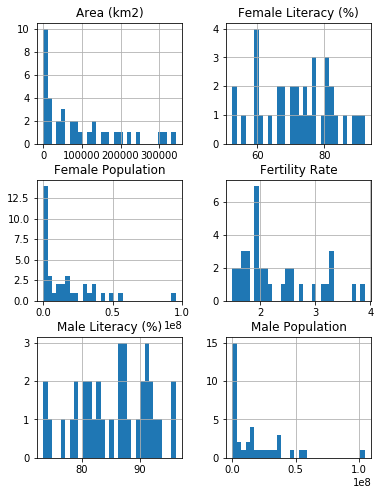

In [39]:
#distribuicao dos dados
data.hist(bins=30,figsize=(6,8))
plt.show()

In [40]:
#criar uma nova coluna populacao
data['population'] = data['Male Population'] + data['Female Population']
total_pop = data['population'].sum()
print("{:,d}".format(total_pop))

1,210,754,977


In [41]:
data['Density'] = data['population']/data['Area (km2)']

In [42]:
data.head()

,Male Population,Female Population,Area (km2),Male Literacy (%),Fertility Rate,Female Literacy (%),population,Density
State/UT,,,,,,,,
Uttar Pradesh,104480510,95331831,240928,79.24,3.7,59.26,199812341,829.344622
Maharashtra,58243056,54131277,307713,89.82,1.9,75.48,112374333,365.192023
Bihar,54278157,49821295,94163,73.39,3.9,53.33,104099452,1105.523953
West Bengal,46809027,44467088,88752,82.67,1.9,71.16,91276115,1028.440091
Madhya Pradesh,37612306,35014503,308245,80.53,3.3,60.02,72626809,235.613908


In [43]:
#Valor medio
data['Area (km2)'].mean()

91312.25

In [44]:
#maximos e minimos
data['Male Literacy (%)'].min()

73.39

In [45]:
data['Male Literacy (%)'].idxmin()

'Bihar'

In [46]:
data.loc[data['Density'].idxmax()]

Male Population        8.887326e+06
Female Population      7.800615e+06
Area (km2)             1.484000e+03
Male Literacy (%)      9.103000e+01
Fertility Rate         1.900000e+00
Female Literacy (%)    8.093000e+01
population             1.668794e+07
Density                1.124524e+04
Name: Delhi, dtype: float64

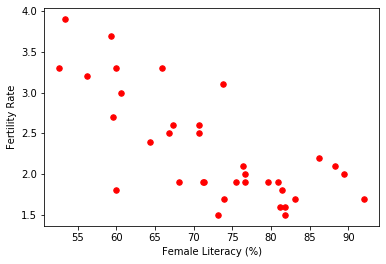

In [47]:
#Verifique correlacao entre variavies
data.plot.scatter('Female Literacy (%)', 'Fertility Rate',s=30,color='r')

**4. Lendo Tabelas HTML**

In [48]:
url = 'https://courses.lumenlearning.com/astronomy/chapter/physical-and-orbital-data-for-the-planets/'
data_web = pd.read_html(url,header=1,index_col=0)              
#match = 'Physical Data for the Major Planets'

In [49]:
data_web[0].head(6)

,Mean Diameter (km),Mean Diameter (Earth = 1),Mass (Earth = 1),Mean Density (g/cm3),Rotation Period (d),Inclination of Equator to Orbit (°),Surface Gravity (Earth = 1[g]),Velocity of Escape (km/s)
Major Planet,,,,,,,,
Mercury,4879,0.38,0.055,5.43,58.,0.0,0.38,4.3
Venus,12104,0.95,0.815,5.24,−243.,177.0,0.90,10.4
Earth,12756,1.00,1.000,5.51,1.000,23.4,1.00,11.2
Mars,6779,0.53,0.110,3.93,1.026,25.2,0.38,5.0
Jupiter,140000,10.90,318.000,1.33,0.414,3.1,2.53,60.0
Saturn,117000,9.13,95.200,0.69,0.440,26.7,1.07,36.0


In [50]:
data_web[0]['Mass (Earth = 1)'].idxmax()

'Jupiter'

**5. Indexação Avançada**

In [51]:
cidades = ('Paris', 'Berlin', 'Viena', 'Londres', 'Madri')
meses = ('Jan', 'Abr', 'Jul', 'Out')

In [52]:
index = pd.MultiIndex.from_product((cidades, meses))
index.names = ['Cidade', 'Mes']

In [53]:
index

MultiIndex([(  'Paris', 'Jan'),
            (  'Paris', 'Abr'),
            (  'Paris', 'Jul'),
            (  'Paris', 'Out'),
            ( 'Berlin', 'Jan'),
            ( 'Berlin', 'Abr'),
            ( 'Berlin', 'Jul'),
            ( 'Berlin', 'Out'),
            (  'Viena', 'Jan'),
            (  'Viena', 'Abr'),
            (  'Viena', 'Jul'),
            (  'Viena', 'Out'),
            ('Londres', 'Jan'),
            ('Londres', 'Abr'),
            ('Londres', 'Jul'),
            ('Londres', 'Out'),
            (  'Madri', 'Jan'),
            (  'Madri', 'Abr'),
            (  'Madri', 'Jul'),
            (  'Madri', 'Out')],
           names=['Cidade', 'Mes'])

In [54]:
temps = [[4.9, 11.5, 20.5, 13.0], [0.1, 9.0, 19.1, 9.4] ,
         [0.3, 10.7, 20.8, 10.2], [5.2 , 9.9 , 18.7 , 12.0] ,
         [6.3, 12.9, 25.6 , 15.1]] 
temps

[[4.9, 11.5, 20.5, 13.0],
 [0.1, 9.0, 19.1, 9.4],
 [0.3, 10.7, 20.8, 10.2],
 [5.2, 9.9, 18.7, 12.0],
 [6.3, 12.9, 25.6, 15.1]]

In [55]:
chuvas = [[51.0, 51.8, 62.3, 61.5], [37.2, 33.7, 52.5, 32.2],
         [38., 45., 70., 38.], [55.2, 43.7, 44.5, 68.5] ,
         [33., 45., 12., 60.]]

In [56]:
arr = np.array((temps, chuvas))
arr.shape

(2, 5, 4)

In [57]:
#reshape e transpose
arr1 = arr.reshape((2,20)).T
arr1

array([[ 4.9, 51. ],
       [11.5, 51.8],
       [20.5, 62.3],
       [13. , 61.5],
       [ 0.1, 37.2],
       [ 9. , 33.7],
       [19.1, 52.5],
       [ 9.4, 32.2],
       [ 0.3, 38. ],
       [10.7, 45. ],
       [20.8, 70. ],
       [10.2, 38. ],
       [ 5.2, 55.2],
       [ 9.9, 43.7],
       [18.7, 44.5],
       [12. , 68.5],
       [ 6.3, 33. ],
       [12.9, 45. ],
       [25.6, 12. ],
       [15.1, 60. ]])

In [58]:
df3 = pd.DataFrame(arr1,index=index,columns=['Temp Media','Chuva'])
df3

Temp Media  Chuva
Cidade  Mes                   
Paris   Jan         4.9   51.0
        Abr        11.5   51.8
        Jul        20.5   62.3
        Out        13.0   61.5
Berlin  Jan         0.1   37.2
        Abr         9.0   33.7
        Jul        19.1   52.5
        Out         9.4   32.2
Viena   Jan         0.3   38.0
        Abr        10.7   45.0
        Jul        20.8   70.0
        Out        10.2   38.0
Londres Jan         5.2   55.2
        Abr         9.9   43.7
        Jul        18.7   44.5
        Out        12.0   68.5
Madri   Jan         6.3   33.0
        Abr        12.9   45.0
        Jul        25.6   12.0
        Out        15.1   60.0

In [59]:
#usando loc
df3.loc['Londres']

,Temp Media,Chuva
Mes,,
Jan,5.2,55.2
Abr,9.9,43.7
Jul,18.7,44.5
Out,12.0,68.5


In [60]:
df3.loc[('Londres','Abr')]

Temp Media     9.9
Chuva         43.7
Name: (Londres, Abr), dtype: float64

In [61]:
df3.loc[('Londres','Abr'),'Chuva']
#df3.loc[('Londres','Abr'),['Temp Media','Chuva']]

43.7

In [62]:
#Para slicing, primeiro DEVEMOS ordenar (sorting)
df3.sort_index(inplace=True)
df3

Temp Media  Chuva
Cidade  Mes                   
Berlin  Abr         9.0   33.7
        Jan         0.1   37.2
        Jul        19.1   52.5
        Out         9.4   32.2
Londres Abr         9.9   43.7
        Jan         5.2   55.2
        Jul        18.7   44.5
        Out        12.0   68.5
Madri   Abr        12.9   45.0
        Jan         6.3   33.0
        Jul        25.6   12.0
        Out        15.1   60.0
Paris   Abr        11.5   51.8
        Jan         4.9   51.0
        Jul        20.5   62.3
        Out        13.0   61.5
Viena   Abr        10.7   45.0
        Jan         0.3   38.0
        Jul        20.8   70.0
        Out        10.2   38.0

In [63]:
#slicing
df3.loc['Berlin':'Madri']

Temp Media  Chuva
Cidade  Mes                   
Berlin  Abr         9.0   33.7
        Jan         0.1   37.2
        Jul        19.1   52.5
        Out         9.4   32.2
Londres Abr         9.9   43.7
        Jan         5.2   55.2
        Jul        18.7   44.5
        Out        12.0   68.5
Madri   Abr        12.9   45.0
        Jan         6.3   33.0
        Jul        25.6   12.0
        Out        15.1   60.0

In [64]:
#Para selecionar um subconjunto nos indices internos, devemos escrever o PAR de indices:
df3.loc[('Berlin','Abr'):('Berlin','Jul')]

Temp Media  Chuva
Cidade Mes                   
Berlin Abr         9.0   33.7
       Jan         0.1   37.2
       Jul        19.1   52.5

In [65]:
#para manter os meses em ordem cronologia
df4 = df3.rename({'Jan': 1, 'Abr': 4, 'Jul': 7, 'Out': 10})
df4.sort_index(inplace =True)
df4

Temp Media  Chuva
Cidade  Mes                   
Berlin  1           0.1   37.2
        4           9.0   33.7
        7          19.1   52.5
        10          9.4   32.2
Londres 1           5.2   55.2
        4           9.9   43.7
        7          18.7   44.5
        10         12.0   68.5
Madri   1           6.3   33.0
        4          12.9   45.0
        7          25.6   12.0
        10         15.1   60.0
Paris   1           4.9   51.0
        4          11.5   51.8
        7          20.5   62.3
        10         13.0   61.5
Viena   1           0.3   38.0
        4          10.7   45.0
        7          20.8   70.0
        10         10.2   38.0

In [66]:
df3.xs('Jul',level=1)
#no level=1, procure 'Jul'

,Temp Media,Chuva
Cidade,,
Berlin,19.1,52.5
Londres,18.7,44.5
Madri,25.6,12.0
Paris,20.5,62.3
Viena,20.8,70.0


In [67]:
df3.unstack()

Temp Media                  Chuva                  
Mes            Abr  Jan   Jul   Out   Abr   Jan   Jul   Out
Cidade                                                     
Berlin         9.0  0.1  19.1   9.4  33.7  37.2  52.5  32.2
Londres        9.9  5.2  18.7  12.0  43.7  55.2  44.5  68.5
Madri         12.9  6.3  25.6  15.1  45.0  33.0  12.0  60.0
Paris         11.5  4.9  20.5  13.0  51.8  51.0  62.3  61.5
Viena         10.7  0.3  20.8  10.2  45.0  38.0  70.0  38.0

Veja um tutorial interessante sobre MultiIndex em
https://towardsdatascience.com/accessing-data-in-a-multiindex-dataframe-in-pandas-569e8767201d

**6. Limpeza de Dados**

In [68]:
#detectando valores invalidos
df = pd.DataFrame ([[1.1, np.nan, np.nan, 10.3],
 [0.8, np.nan, 3.6, 2.9], [1.2, 2.5, 1.6, 2.7],
 [np.nan, np.nan, np.nan, np.nan],
 [np.nan, np.nan, 3.6, 5.3]],columns =list('ABCD'))
df

,A,B,C,D
0,1.1,NaN,NaN,10.3
1,0.8,NaN,3.6,2.9
2,1.2,2.5,1.6,2.7
3,NaN,NaN,NaN,NaN
4,NaN,NaN,3.6,5.3


In [69]:
df.isnull()

,A,B,C,D
0,False,True,True,False
1,False,True,False,False
2,False,False,False,False
3,True,True,True,True
4,True,True,False,False


In [70]:
#df.loc[df['A'].isnull()]

In [71]:
df.isnull().sum()

A    2
B    4
C    2
D    1
dtype: int64

In [72]:
df['A'].isnull()

0    False
1    False
2    False
3     True
4     True
Name: A, dtype: bool

In [73]:
#excluindo valores invalidos
df.dropna()

,A,B,C,D
2,1.2,2.5,1.6,2.7


In [74]:
#excluindo valores apenas se TODOS os valores invalidos
#how = 'all'. Default is 'any'
df.dropna(how='all')

,A,B,C,D
0,1.1,NaN,NaN,10.3
1,0.8,NaN,3.6,2.9
2,1.2,2.5,1.6,2.7
4,NaN,NaN,3.6,5.3


In [75]:
#excluindo valores ao longo de um eixo
#exemplo: minimo três valores NÃO NaN
df.dropna(thresh=3, axis=0) 

,A,B,C,D
1,0.8,NaN,3.6,2.9
2,1.2,2.5,1.6,2.7


In [76]:
#Substituindo NaN
df.fillna(1.0)

,A,B,C,D
0,1.1,1.0,1.0,10.3
1,0.8,1.0,3.6,2.9
2,1.2,2.5,1.6,2.7
3,1.0,1.0,1.0,1.0
4,1.0,1.0,3.6,5.3


In [77]:
#Substituindo NaN 
#forward-fill (direção COLUNAS)
df.fillna(method ='ffill',axis=0)

,A,B,C,D
0,1.1,NaN,NaN,10.3
1,0.8,NaN,3.6,2.9
2,1.2,2.5,1.6,2.7
3,1.2,2.5,1.6,2.7
4,1.2,2.5,3.6,5.3


In [78]:
#forward-fill (direção LINHAS)
df.fillna(method ='ffill',axis=1)

,A,B,C,D
0,1.1,1.1,1.1,10.3
1,0.8,0.8,3.6,2.9
2,1.2,2.5,1.6,2.7
3,NaN,NaN,NaN,NaN
4,NaN,NaN,3.6,5.3


In [79]:
#backward-fill
df.fillna(method ='bfill',axis=1)

,A,B,C,D
0,1.1,10.3,10.3,10.3
1,0.8,3.6,3.6,2.9
2,1.2,2.5,1.6,2.7
3,NaN,NaN,NaN,NaN
4,3.6,3.6,3.6,5.3


In [80]:
#Substituindo pela media
df.fillna({'A': df['A'].mean(), 'C':df['C'].mean()})

,A,B,C,D
0,1.100000,NaN,2.933333,10.3
1,0.800000,NaN,3.600000,2.9
2,1.200000,2.5,1.600000,2.7
3,1.033333,NaN,2.933333,NaN
4,1.033333,NaN,3.600000,5.3


In [81]:
#Substituindo pela media e zero p/ os outros
df.fillna({'A': df['A'].mean(), 'C':df['C'].mean()}).fillna(0.)

,A,B,C,D
0,1.100000,0.0,2.933333,10.3
1,0.800000,0.0,3.600000,2.9
2,1.200000,2.5,1.600000,2.7
3,1.033333,0.0,2.933333,0.0
4,1.033333,0.0,3.600000,5.3


**7. Dados Duplicados**

In [82]:
df = pd.DataFrame([['Lithium', 'Li', 3, 6, 0.0759] ,
  ['Lithium ', 'Li', 3, 7, 0.9241],
  ['Potassium', 'K', 19, 39, 0.932581] ,
  ['Potassium', 'K', 19, 40, 1.17e-4]],
  columns=['Element', 'Symbol', 'Z', 'A', 'Abundance'])
df

,Element,Symbol,Z,A,Abundance
0,Lithium,Li,3,6,0.075900
1,Lithium,Li,3,7,0.924100
2,Potassium,K,19,39,0.932581
3,Potassium,K,19,40,0.000117


In [83]:
df.duplicated(['Symbol','Z'])

0    False
1     True
2    False
3     True
dtype: bool

In [84]:
df.drop_duplicates(['Symbol','Z'])

,Element,Symbol,Z,A,Abundance
0,Lithium,Li,3,6,0.075900
2,Potassium,K,19,39,0.932581


In [85]:
df.drop_duplicates(['Symbol','Z'],keep='last')

,Element,Symbol,Z,A,Abundance
1,Lithium,Li,3,7,0.924100
3,Potassium,K,19,40,0.000117


**Exemplo com dados reais usando MultiIndex e NaN**

In [86]:
#Exemplo - casos de turbeculoe nos EUA
#arquivo turbeculose_eua.txt
#df = pd.read_csv('turbeculose_eua.txt')
#arquivo em: 
df = pd.read_csv('../pcientifico_dados/turbeculose_eua.txt',sep='\t')
df.head()

,Notes,State,State Code,Year,Year Code,Cases,Percent of Total
0,NaN,Alabama,1.0,2018.0,2018.0,91.0,0.02%
1,NaN,Alabama,1.0,2017.0,2017.0,120.0,0.03%
2,NaN,Alabama,1.0,2016.0,2016.0,112.0,0.03%
3,NaN,Alabama,1.0,2015.0,2015.0,119.0,0.03%
4,NaN,Alabama,1.0,2014.0,2014.0,133.0,0.04%


In [87]:
df = df.drop(['Notes','State Code','Year Code','Percent of Total'],axis=1)

In [88]:
df

,State,Year,Cases
0,Alabama,2018.0,91.0
1,Alabama,2017.0,120.0
2,Alabama,2016.0,112.0
3,Alabama,2015.0,119.0
4,Alabama,2014.0,133.0
...,...,...,...
1390,NaN,NaN,NaN
1391,NaN,NaN,NaN
1392,NaN,NaN,NaN
1393,NaN,NaN,NaN


In [89]:
df = df.dropna(how='any',axis=0)

In [90]:
df.isnull().sum()

State    0
Year     0
Cases    0
dtype: int64

In [91]:
df.index = pd.MultiIndex.from_frame(df[['State', 'Year']])   
df

State    Year  Cases
State   Year                          
Alabama 2018.0  Alabama  2018.0   91.0
        2017.0  Alabama  2017.0  120.0
        2016.0  Alabama  2016.0  112.0
        2015.0  Alabama  2015.0  119.0
        2014.0  Alabama  2014.0  133.0
...                 ...     ...    ...
Wyoming 1997.0  Wyoming  1997.0    2.0
        1996.0  Wyoming  1996.0    7.0
        1995.0  Wyoming  1995.0    5.0
        1994.0  Wyoming  1994.0   12.0
        1993.0  Wyoming  1993.0    7.0

[1323 rows x 3 columns]

In [92]:
df = df.drop(['State', 'Year'],axis=1)
df

Cases
State   Year         
Alabama 2018.0   91.0
        2017.0  120.0
        2016.0  112.0
        2015.0  119.0
        2014.0  133.0
...               ...
Wyoming 1997.0    2.0
        1996.0    7.0
        1995.0    5.0
        1994.0   12.0
        1993.0    7.0

[1323 rows x 1 columns]

In [93]:
#vamos plotar numero de casos vs anos
df2 = df.unstack(level=0)
df2.head()

Cases                                                          \
State  Alabama Alaska Arizona Arkansas California Colorado Connecticut   
Year                                                                     
1993.0   487.0   57.0   228.0    209.0     5146.0    107.0       154.0   
1994.0   433.0   92.0   247.0    264.0     4834.0     93.0       147.0   
1995.0   420.0   82.0   317.0    271.0     4656.0     92.0       139.0   
1996.0   423.0   97.0   282.0    225.0     4288.0    101.0       138.0   
1997.0   405.0   78.0   296.0    200.0     4045.0     94.0       128.0   

                                              ...                         \
State  Delaware District of Columbia Florida  ... South Dakota Tennessee   
Year                                          ...                          
1993.0     66.0                162.0  1646.0  ...         16.0     554.0   
1994.0     55.0                120.0  1742.0  ...         28.0     519.0   
1995.0     56.0                102.0  1547.0  ...         28.0     465.0   
1996.0     43.0                139.0  1410.0  ...         19.0     504.0   
1997.0     38.0                110.0  1393.0  ...         19.0     468.0   

                                                                          \
State    Texas  Utah Vermont Virginia Washington West Virginia Wisconsin   
Year                                                                       
1993.0  2370.0  47.0     7.0    456.0      283.0          75.0     102.0   
1994.0  2511.0  56.0    11.0    370.0      260.0          80.0     110.0   
1995.0  2340.0  48.0     4.0    356.0      277.0          71.0     119.0   
1996.0  2066.0  58.0     4.0    348.0      283.0          57.0     114.0   
1997.0  1980.0  36.0     6.0    349.0      305.0          54.0     130.0   

                
State  Wyoming  
Year            
1993.0     7.0  
1994.0    12.0  
1995.0     5.0  
1996.0     7.0  
1997.0     2.0  

[5 rows x 51 columns]

In [94]:
idx = df2.max() > 500
idx

       State               
Cases  Alabama                 False
       Alaska                  False
       Arizona                 False
       Arkansas                False
       California               True
       Colorado                False
       Connecticut             False
       Delaware                False
       District of Columbia    False
       Florida                  True
       Georgia                  True
       Hawaii                  False
       Idaho                   False
       Illinois                 True
       Indiana                 False
       Iowa                    False
       Kansas                  False
       Kentucky                False
       Louisiana               False
       Maine                   False
       Maryland                False
       Massachusetts           False
       Michigan                False
       Minnesota               False
       Mississippi             False
       Missouri                False
       Mon

In [95]:
#df2.head()
df2.T.head()

Year              1993.0  1994.0  1995.0  1996.0  1997.0  1998.0  1999.0  \
      State                                                                
Cases Alabama      487.0   433.0   420.0   423.0   405.0   381.0   314.0   
      Alaska        57.0    92.0    82.0    97.0    78.0    55.0    61.0   
      Arizona      228.0   247.0   317.0   282.0   296.0   254.0   262.0   
      Arkansas     209.0   264.0   271.0   225.0   200.0   171.0   181.0   
      California  5146.0  4834.0  4656.0  4288.0  4045.0  3850.0  3604.0   

Year              2000.0  2001.0  2002.0  ...  2009.0  2010.0  2011.0  2012.0  \
      State                               ...                                   
Cases Alabama      310.0   264.0   233.0  ...   168.0   146.0   161.0   134.0   
      Alaska       108.0    54.0    49.0  ...    37.0    57.0    67.0    65.0   
      Arizona      261.0   289.0   263.0  ...   232.0   282.0   255.0   211.0   
      Arkansas     199.0   162.0   136.0  ...    82.0    78.0    85.0    70.0   
      California  3288.0  3329.0  3172.0  ...  2466.0  2323.0  2320.0  2185.0   

Year              2013.0  2014.0  2015.0  2016.0  2017.0  2018.0  
      State                                                       
Cases Alabama      108.0   133.0   119.0   112.0   120.0    91.0  
      Alaska        71.0    62.0    68.0    57.0    53.0    63.0  
      Arizona      184.0   193.0   198.0   188.0   188.0   178.0  
      Arkansas      72.0    93.0    90.0    91.0    85.0    78.0  
      California  2163.0  2130.0  2131.0  2058.0  2058.0  2092.0  

[5 rows x 26 columns]

In [96]:
df2.T.index[:4]

MultiIndex([('Cases',  'Alabama'),
            ('Cases',   'Alaska'),
            ('Cases',  'Arizona'),
            ('Cases', 'Arkansas')],
           names=[None, 'State'])

In [97]:
df3 = df2.T[idx].T
df3.head()

Cases                                                              \
State  California Florida Georgia Illinois New Jersey New York North Carolina   
Year                                                                            
1993.0     5146.0  1646.0   809.0   1234.0      911.0   3864.0          594.0   
1994.0     4834.0  1742.0   740.0   1115.0      853.0   3575.0          565.0   
1995.0     4656.0  1547.0   735.0   1022.0      848.0   3018.0          518.0   
1996.0     4288.0  1410.0   792.0   1063.0      820.0   2545.0          554.0   
1997.0     4045.0  1393.0   695.0    964.0      718.0   2230.0          463.0   

                                       
State  Pennsylvania Tennessee   Texas  
Year                                   
1993.0        741.0     554.0  2370.0  
1994.0        616.0     519.0  2511.0  
1995.0        673.0     465.0  2340.0  
1996.0        580.0     504.0  2066.0  
1997.0        524.0     468.0  1980.0

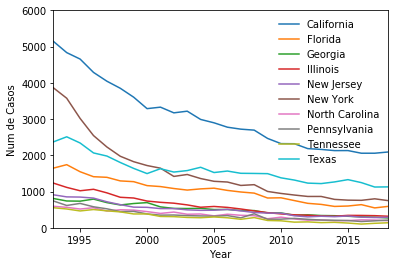

In [98]:
df3.plot()
plt.ylim(0,6000)
plt.ylabel('Num de Casos')
plt.legend(df3.columns.get_level_values('State'),frameon=False)

In [99]:
#df3.columns
#df3.loc[:,[('Cases','California'),('Cases','Florida')]].plot()

**7. Agrupamento**

In [100]:
df = pd.DataFrame({'Letra': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': np.arange(2,5.0,0.5)})                   
df

,Letra,data1,data2
0,A,0,2.0
1,B,1,2.5
2,C,2,3.0
3,A,3,3.5
4,B,4,4.0
5,C,5,4.5


In [101]:
#vamos agrupar pela coluna 'Letra'
grupo = df.groupby('Letra')
grupo.sum()

,data1,data2
Letra,,
A,3,5.5
B,5,6.5
C,7,7.5


In [102]:
grupo['data1'].mean()

Letra
A    1.5
B    2.5
C    3.5
Name: data1, dtype: float64

In [103]:
#Aplicar operações diferentes em diferentes colunas
grupo.aggregate({'data1':'min','data2':'max'})

,data1,data2
Letra,,
A,0,3.5
B,1,4.0
C,2,4.5


In [104]:
#agrupamento com mapeamento
df2 = df.set_index('Letra')
df2

,data1,data2
Letra,,
A,0,2.0
B,1,2.5
C,2,3.0
A,3,3.5
B,4,4.0
C,5,4.5


In [105]:
mapa = {'A':'vogal','B':'consoante','C':'consoante'}

In [106]:
df2.groupby(mapa).sum()

,data1,data2
consoante,12,14.0
vogal,3,5.5


In [107]:
#for l,g in grupo:
#    print(l,'\n',g)

**8. Concatenação**

In [108]:
df1 = pd.DataFrame({'A':('A1','A2'),'B':('B1','B2')},index=[1,2])
df2 = pd.DataFrame({'A':('A3','A4'),'B':('B3','B4')},index=[3,4])

In [109]:
print(df1);print('\n',df2)

    A   B
1  A1  B1
2  A2  B2

     A   B
3  A3  B3
4  A4  B4


In [110]:
pd.concat([df1,df2])

,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


In [111]:
df3 = pd.DataFrame({'A':('A5','A6'),'B':('B5','B6'),'C':('C1','C2')},index=[1,2])

In [112]:
pd.concat([df1,df3],sort=True)

,A,B,C
1,A1,B1,NaN
2,A2,B2,NaN
1,A5,B5,C1
2,A6,B6,C2


In [113]:
pd.concat([df1,df3],axis=1,sort=True)

,A,B,A,B,C
1,A1,B1,A5,B5,C1
2,A2,B2,A6,B6,C2
